In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display
import os
import ast

# I. Load 5 similar dfs and megre them vertically


In [ ]:
df=[0,0,0,0,0,0]

base_dir = '/content/drive/MyDrive/crawl_booking'
for i in range(6):
    df[i] = pd.read_excel(f'{base_dir}/new_crawling_{i}.xlsx')
    df[i]['star'] = i
df = pd.concat(df, ignore_index=True)

In [ ]:
display(df.head(5))

,Unnamed: 0.1,Unnamed: 0,link,hotel_name,review_score,review_count,price,address,image,facilities,subscore,star
0,0,0,https://www.booking.com/hotel/vn/cactos-bar-am...,Cactos Bar & Homestay,NaN,NaN,VND 135.000,Quận 12,https://cf.bstatic.com/xdata/images/hotel/squa...,"['2 hồ bơi', 'Phòng gia đình', 'Phòng không h...","{'Nhân viên phục vụ': 10.0, 'Tiện nghi': 10....",0
1,1,1,https://www.booking.com/hotel/vn/saigon-city-c...,Saigon City Center Hostel,"6,4",270.0,VND 170.000,Quận 1,https://cf.bstatic.com/xdata/images/hotel/squa...,"['2 hồ bơi', 'Phòng gia đình', 'Lễ tân 24h', '...","{'Nhân viên phục vụ': 7.3, 'Tiện nghi': 6.5,...",0
2,2,2,https://www.booking.com/hotel/vn/sh-capsule-3-...,Start House CAPSULE 5 min walk to the Airport,"8,5",156.0,VND 180.000,Quận Tân Bình,https://cf.bstatic.com/xdata/images/hotel/squa...,"['2 hồ bơi', 'Chỗ đỗ xe miễn phí', 'Lễ tân...","{'Nhân viên phục vụ': 9.6, 'Tiện nghi': 8.2,...",0
3,3,3,https://www.booking.com/hotel/vn/kim-hostel-qu...,Kim Hostel,"3,0",1.0,VND 200.000,Quận 1,https://cf.bstatic.com/xdata/images/hotel/squa...,"['2 hồ bơi', 'Chỗ đỗ xe miễn phí', 'Bữa sá...","{'Nhân viên phục vụ': 7.5, 'Tiện nghi': 6.3,...",0
4,4,4,https://www.booking.com/hotel/vn/kim-hostel-ho...,KIM HOSTEL,"4,0",3.0,VND 200.000,Quận 1,https://cf.bstatic.com/xdata/images/hotel/squa...,NaN,"{'Nhân viên phục vụ': 5.8, 'Tiện nghi': 5.8,...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  2351 non-null   int64  
 1   Unnamed: 0    2351 non-null   int64  
 2   link          2351 non-null   object 
 3   hotel_name    2351 non-null   object 
 4   review_score  1943 non-null   object 
 5   review_count  1943 non-null   float64
 6   price         2351 non-null   object 
 7   address       2351 non-null   object 
 8   image         2351 non-null   object 
 9   facilities    2234 non-null   object 
 10  subscore      2351 non-null   object 
 11  star          2351 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 220.5+ KB


# II. Do EDA --> Clean and wrangle data


In [ ]:
# Define facility mappings
facility_mappings = {
    'Pool': '2 hồ bơi',
    'No_smoking_room': 'Phòng không hút thuốc',
    'Families_room': 'Phòng gia đình',
    'Room_service': 'Dịch vụ phòng',
    'Free_parking': 'Chỗ đỗ xe miễn phí',
    'Breakfast': 'Bữa sáng rất tốt',
    '24h_front_desk': 'Lễ tân 24h',
    'Airport_shuttle': ['Xe đưa đón sân bay', 'Xe đưa đón sân bay miễn phí']
}

# Create new columns with default value 0
for col in facility_mappings.keys():
    df[col] = 0

# Update values in new columns based on 'facilities'
for index, row in df.iterrows():
    if pd.isna(row['facilities']):
        continue

    facility_list = ast.literal_eval(row['facilities'])

    for col, facility in facility_mappings.items():
        if isinstance(facility, list):
            if any(fac in facility_list for fac in facility):
                df.at[index, col] = 1
        else:
            if facility in facility_list:
                df.at[index, col] = 1

display(df.head(5))

,Unnamed: 0.1,Unnamed: 0,link,hotel_name,review_score,review_count,price,address,image,facilities,subscore,star,Pool,No_smoking_room,Families_room,Room_service,Free_parking,Breakfast,24h_front_desk,Airport_shuttle
0,0,0,https://www.booking.com/hotel/vn/cactos-bar-am...,Cactos Bar & Homestay,NaN,NaN,VND 135.000,Quận 12,https://cf.bstatic.com/xdata/images/hotel/squa...,"['2 hồ bơi', 'Phòng gia đình', 'Phòng không h...","{'Nhân viên phục vụ': 10.0, 'Tiện nghi': 10....",0,1,1,1,0,1,1,0,0
1,1,1,https://www.booking.com/hotel/vn/saigon-city-c...,Saigon City Center Hostel,"6,4",270.0,VND 170.000,Quận 1,https://cf.bstatic.com/xdata/images/hotel/squa...,"['2 hồ bơi', 'Phòng gia đình', 'Lễ tân 24h', '...","{'Nhân viên phục vụ': 7.3, 'Tiện nghi': 6.5,...",0,1,0,1,1,0,0,1,0
2,2,2,https://www.booking.com/hotel/vn/sh-capsule-3-...,Start House CAPSULE 5 min walk to the Airport,"8,5",156.0,VND 180.000,Quận Tân Bình,https://cf.bstatic.com/xdata/images/hotel/squa...,"['2 hồ bơi', 'Chỗ đỗ xe miễn phí', 'Lễ tân...","{'Nhân viên phục vụ': 9.6, 'Tiện nghi': 8.2,...",0,1,0,0,1,1,1,1,0
3,3,3,https://www.booking.com/hotel/vn/kim-hostel-qu...,Kim Hostel,"3,0",1.0,VND 200.000,Quận 1,https://cf.bstatic.com/xdata/images/hotel/squa...,"['2 hồ bơi', 'Chỗ đỗ xe miễn phí', 'Bữa sá...","{'Nhân viên phục vụ': 7.5, 'Tiện nghi': 6.3,...",0,1,0,0,0,1,1,0,0
4,4,4,https://www.booking.com/hotel/vn/kim-hostel-ho...,KIM HOSTEL,"4,0",3.0,VND 200.000,Quận 1,https://cf.bstatic.com/xdata/images/hotel/squa...,NaN,"{'Nhân viên phục vụ': 5.8, 'Tiện nghi': 5.8,...",0,0,0,0,0,0,0,0,0


In [ ]:
# Drop entries where 'review_score' or 'review_count' = NaN or 'review_count' < 5
df = df.dropna(subset=['review_score', 'review_count'])
df = df[df['review_count'] >= 5]

# Split the 'subscore' column into separate columns
subscore_df = df['subscore'].apply(eval).apply(pd.Series)

# Rename the columns1
subscore_df.columns = ['Staff', 'Facilities', 'Cleanliness', 'Comfort', 'Affordable', 'Location', 'Wifi']
# Concatenate the new columns with the original DataFrame
df = pd.concat([df, subscore_df], axis=1)

# Drop the original 'subscore' column
df.drop('subscore', axis=1, inplace=True)

# Specify the columns to drop
columns_to_drop = ["Unnamed: 0.1", "Unnamed: 0", "link", "hotel_name", "facilities", 'image']

# Drop the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)

# Convert dtype of 'review_score' column from object to float64
df['review_score']= df['review_score'].str.replace(',','.').astype(float)

# Convert the 'review_count' column to int
df['review_count'] = df['review_count'].astype(int)
# Convert 'price' to numerical
df['price'] = df['price'].str.replace('VND', '').str.replace('.', '').str.replace(',', '').astype(int)

#Convert object attributes to CATEGORICAL ATTRIBUTES
num_features = ['review_count','price','Staff',
       'Facilities', 'Cleanliness', 'Comfort', 'Affordable', 'Location','Wifi']
cat_features = ['address', 'Pool',
       'No_smoking_room', 'Families_room', 'Room_service', 'Free_parking',
       'Breakfast', '24h_front_desk', 'Airport_shuttle']
def convert_cat(df, cat_features):
    for feature in cat_features:
        df[feature] = df[feature].astype('category')
convert_cat(df,cat_features)

# Display the updated DataFrame
display(df.head(5))

,review_score,review_count,price,address,star,Pool,No_smoking_room,Families_room,Room_service,Free_parking,Breakfast,24h_front_desk,Airport_shuttle,Staff,Facilities,Cleanliness,Comfort,Affordable,Location,Wifi
1,6.4,270,170000,Quận 1,0,1,0,1,1,0,0,1,0,7.3,6.5,6.7,6.5,7.6,7.9,7.5
2,8.5,156,180000,Quận Tân Bình,0,1,0,0,1,1,1,1,0,9.6,8.2,8.2,8.2,9.1,9.4,NaN
6,7.0,18,220000,Quận 1,0,1,0,1,1,1,0,1,0,8.5,6.5,6.4,6.6,7.5,8.0,NaN
7,8.0,274,230000,Quận 1,0,1,0,1,1,0,0,0,0,9.2,7.6,7.8,7.8,8.6,9.2,8.1
8,7.2,178,250000,Quận Bình Thạnh,0,1,1,1,0,1,1,0,0,8.1,7.2,7.1,7.2,7.9,7.8,7.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 1 to 2347
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   review_score     1477 non-null   float64 
 1   review_count     1477 non-null   int64   
 2   price            1477 non-null   int64   
 3   address          1477 non-null   category
 4   star             1477 non-null   int64   
 5   Pool             1477 non-null   category
 6   No_smoking_room  1477 non-null   category
 7   Families_room    1477 non-null   category
 8   Room_service     1477 non-null   category
 9   Free_parking     1477 non-null   category
 10  Breakfast        1477 non-null   category
 11  24h_front_desk   1477 non-null   category
 12  Airport_shuttle  1477 non-null   category
 13  Staff            1413 non-null   float64 
 14  Facilities       1413 non-null   float64 
 15  Cleanliness      1413 non-null   float64 
 16  Comfort          1413 non-null   float64 
 17  

In [ ]:
print(df.describe()),
df.describe(include=['category'])
# df.to_csv('/content/drive/MyDrive/crawl_booking/booking_no_images.csv', index=False)

       review_score  review_count         price         star        Staff  \
count   1477.000000   1477.000000  1.477000e+03  1477.000000  1413.000000   
mean       7.916858    143.483412  6.881338e+05     2.033852     8.620878   
std        1.291086    175.637038  7.101059e+05     1.615119     0.991670   
min        2.400000      5.000000  1.700000e+05     0.000000     3.100000   
25%        7.200000     22.000000  2.800000e+05     0.000000     8.100000   
50%        8.100000     69.000000  5.040000e+05     2.000000     8.800000   
75%        8.800000    199.000000  8.644300e+05     3.000000     9.300000   
max       10.000000    987.000000  9.750000e+06     5.000000    10.000000   

        Facilities  Cleanliness      Comfort  Affordable     Location  \
count  1413.000000  1413.000000  1413.000000  1413.00000  1413.000000   
mean      7.979193     8.126115     8.172187     8.31005     8.577849   
std       1.256493     1.245276     1.166657     1.07331     0.934686   
min       3.10

Comments:

- The review_score ranges from 6.4 to 8.5 with an average around 7.4.
- The review_count varies widely, from 18 to 274.

- The price ranges from 170000 to 250000.
- Ratings like Staff, Facilities, Cleanliness, etc., also have a range from around 6.4 to 9.6.


## II.3 Visualize the distribution of numerical columns


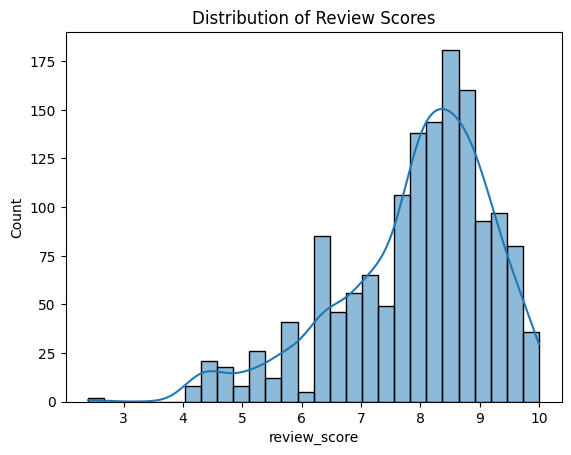

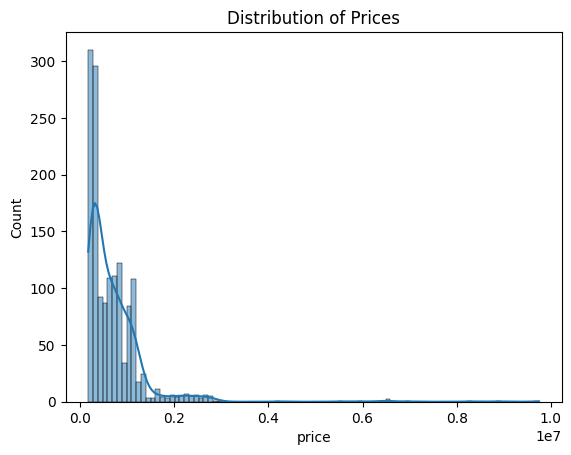

In [ ]:
# Histogram for review_score
sns.histplot(df['review_score'], kde=True)
plt.title('Distribution of Review Scores')
plt.show()

# Histogram for price
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Prices')
plt.show()


In [ ]:
price_cat = ['Economics','Standard','Expensive','Luxury']
quartile_price=pd.qcut(df['price'],4,labels = price_cat)


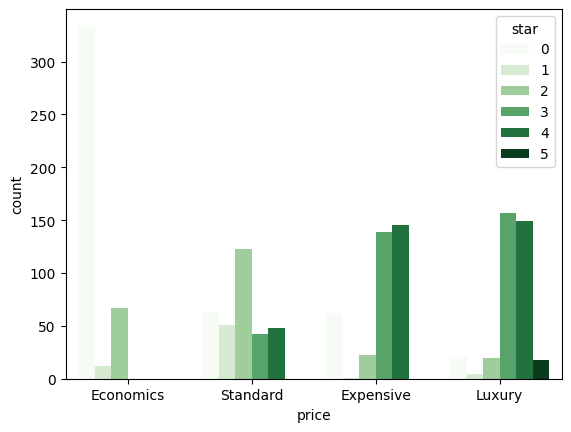

In [ ]:
sns.countplot(x=quartile_price,hue = df['star'],palette='Greens');

## II.4 Explore categorical variables


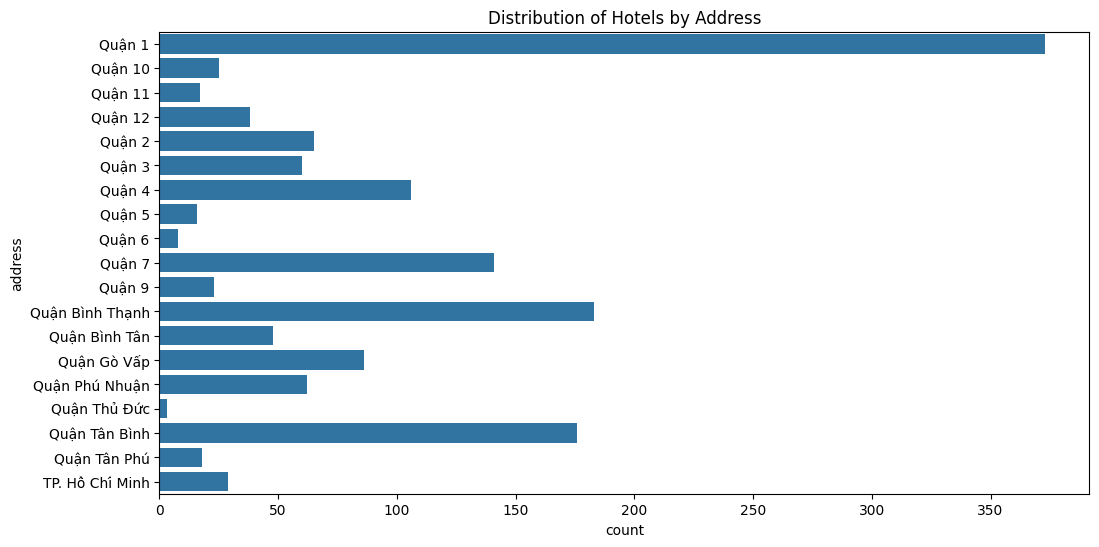

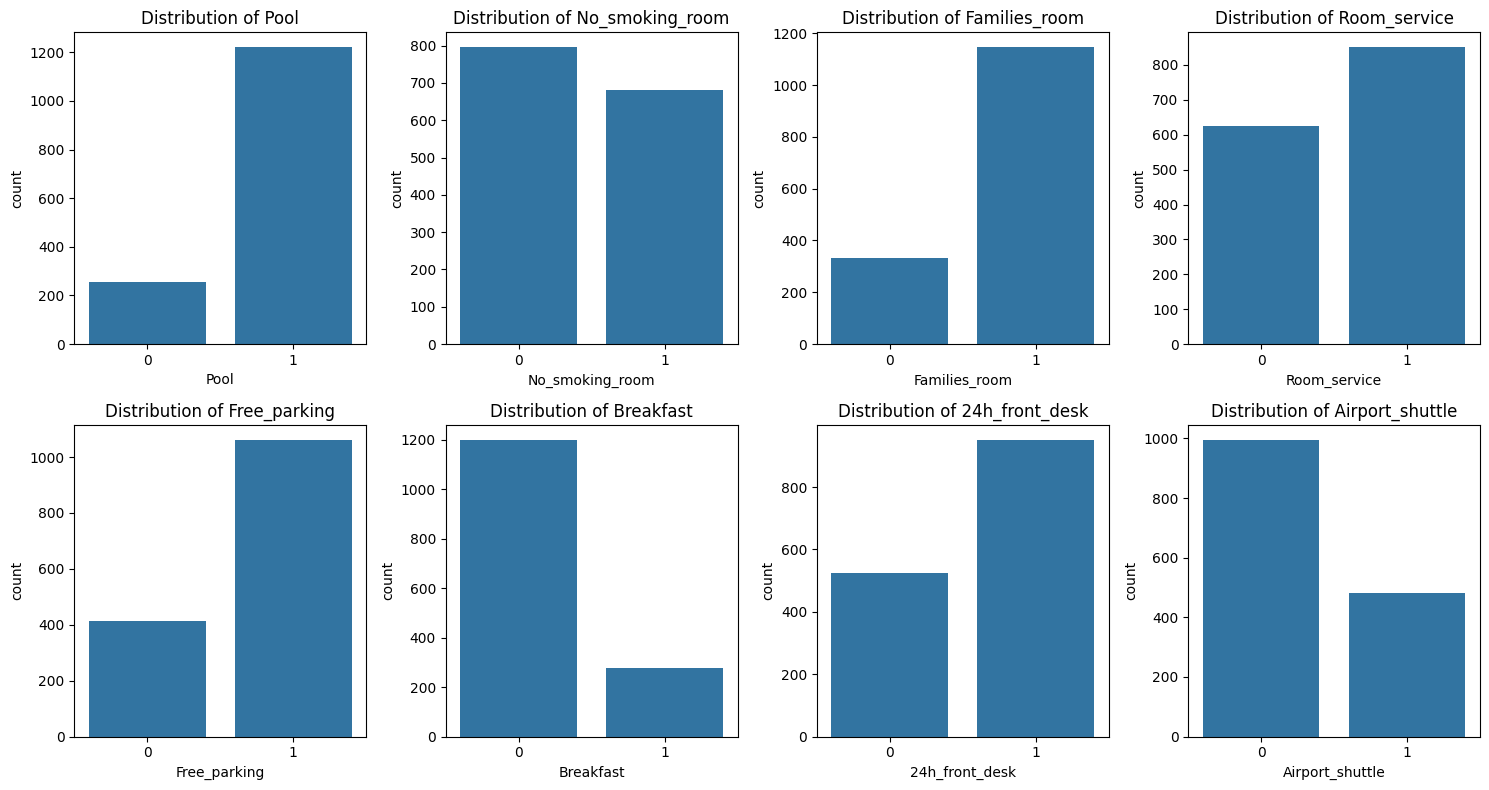

In [ ]:
# Countplot for address
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='address')
plt.title('Distribution of Hotels by Address')
plt.show()

# Countplot for amenities like Pool, No_smoking_room, etc.
amenities = ['Pool', 'No_smoking_room', 'Families_room', 'Room_service', 'Free_parking', 'Breakfast', '24h_front_desk', 'Airport_shuttle']
plt.figure(figsize=(15, 8))
for i, amenity in enumerate(amenities, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=df, x=amenity)
    plt.title(f'Distribution of {amenity}')
plt.tight_layout()
plt.show()


Comments:

- Most hotels are located in Quận 1 and Quận Bình Thạnh.
- Amenities like Pool, Room_service, Free_parking, and Breakfast are more commonly available among the hotels.


      proportion
Pool            
1       0.826676
0       0.173324


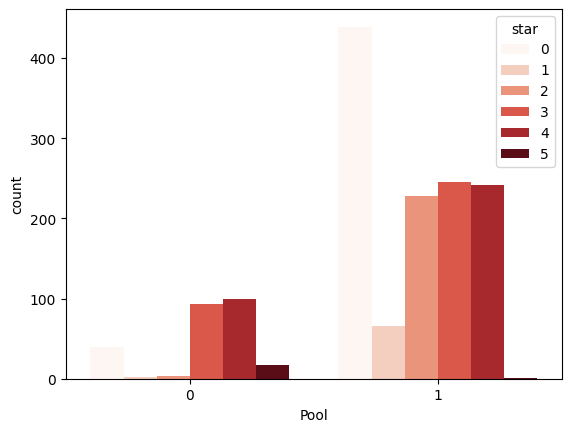

In [ ]:
print(df['Pool'].value_counts(normalize=True).to_frame());
sns.countplot(df, x='Pool',palette='Reds',hue='star');

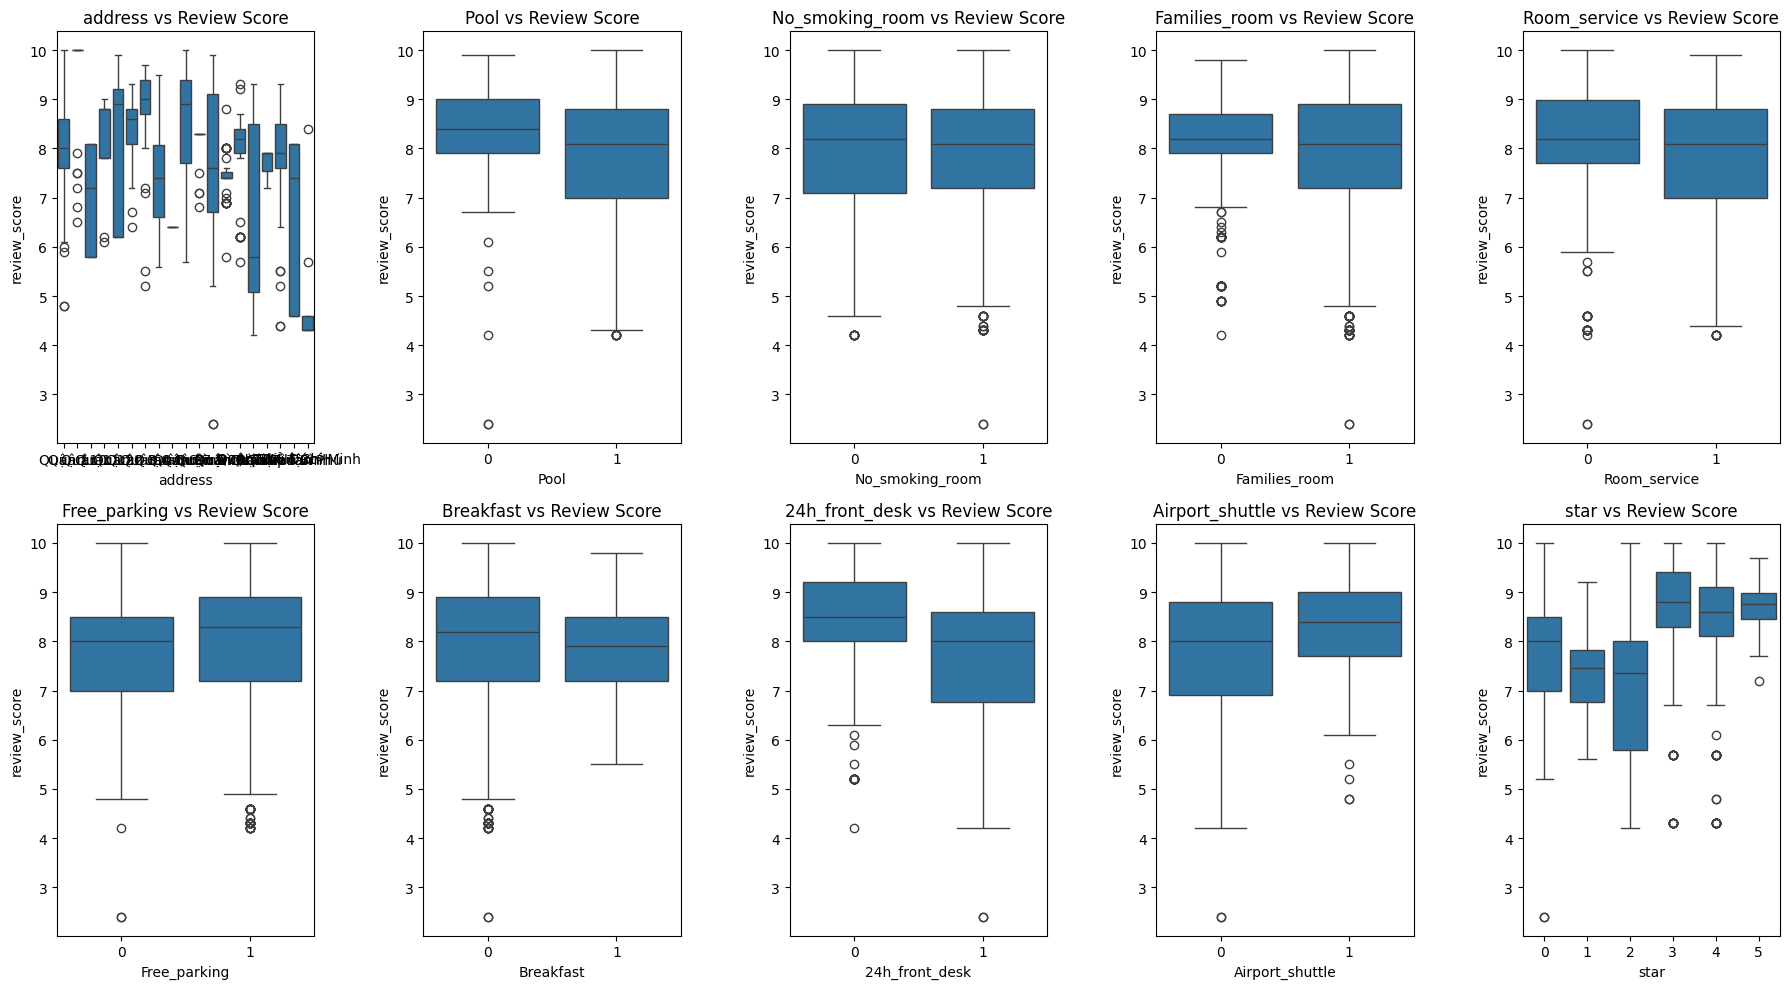

In [ ]:
# Boxplots for categorical features vs. review_score
categorical_features = ['address', 'Pool', 'No_smoking_room', 'Families_room', 'Room_service',
                        'Free_parking', 'Breakfast', '24h_front_desk', 'Airport_shuttle', 'star']

plt.figure(figsize=(18, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=feature, y='review_score', data=df)
    plt.title(f'{feature} vs Review Score')

plt.tight_layout()
plt.show()


Insights:

- address (location) and star seem to have some variations in review_score.
- Amenities like Pool, Room_service, Breakfast, Free_parking, and Airport_shuttle have notable differences in review_score across their categories.


## II.4 Correlation heatmap for numerical variables


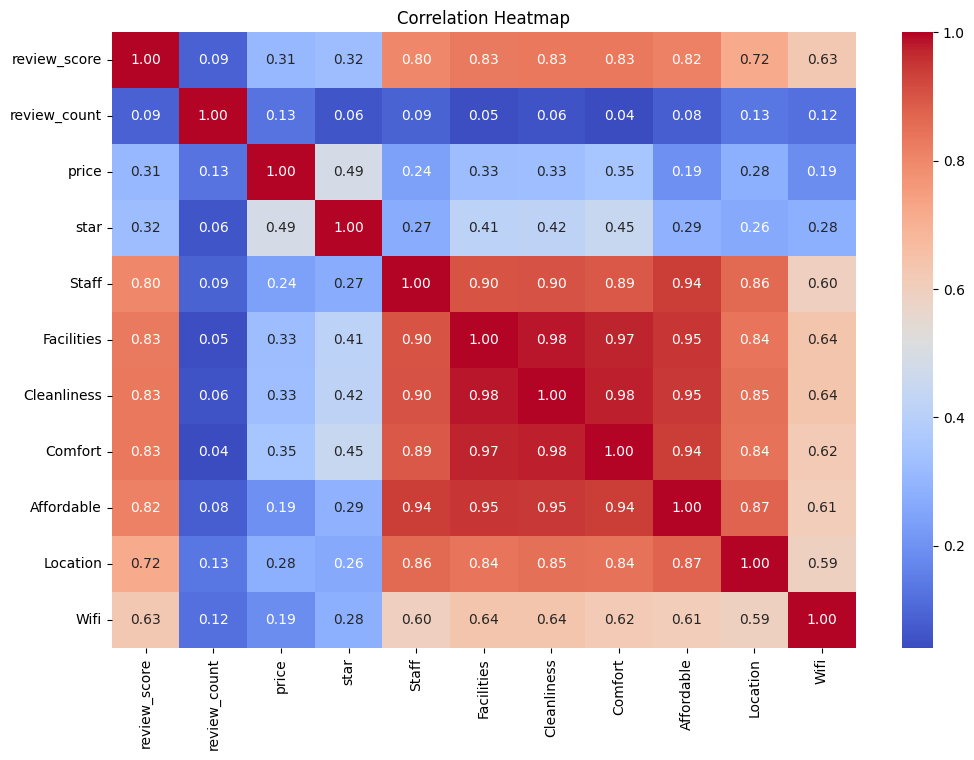

In [ ]:
# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Insights:

- review_count has a slight positive correlation with review_score.

- Cleanliness, Comfort, Staff, and Facilities show strong positive correlations with review_score.

- Location and Wifi have moderate positive correlations with review_score.
- Affordable has a weak positive correlation with review_score.

- review_count and price have relatively weaker correlations with review_score
- Among the rated features (Staff, Facilities, Cleanliness, Comfort, Affordable, Location, Wifi), Cleanliness, Comfort, and Staff have stronger positive correlations with review_score.


In [ ]:
# Selecting highly correlated features with review_score
highly_correlated_numerical_features = correlation_matrix['review_score'].sort_values(ascending=False).head(10)

print(highly_correlated_numerical_features)


review_score    1.000000
Cleanliness     0.831754
Comfort         0.831367
Facilities      0.830582
Affordable      0.815136
Staff           0.799232
Location        0.717171
Wifi            0.627280
star            0.323914
price           0.308794
Name: review_score, dtype: float64


Insights:

- Cleanliness, Comfort, Staff, and Facilities are the most positively correlated with review_score.
  Location and Wifi also show moderate correlations with review_score.
- Affordable, review_count, and price have weaker correlations with review_score.


# III. Preprocess data


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['review_score', 'review_count', 'price', 'address', 'star', 'Pool',
       'No_smoking_room', 'Families_room', 'Room_service', 'Free_parking',
       'Breakfast', '24h_front_desk', 'Airport_shuttle', 'Staff', 'Facilities',
       'Cleanliness', 'Comfort', 'Affordable', 'Location', 'Wifi'],
      dtype='object')

In [ ]:

num_converter = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'median')),
    ('scaler',StandardScaler())])

cat_converter = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown ='ignore'))
])
preprocessor = ColumnTransformer(transformers = [
    ('num',num_converter,num_features),
    ('cat',cat_converter,cat_features)
])